In [151]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [152]:
import time
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from olympus.utils.misc import get_pareto, get_hypervolume, get_cells
from olympus.scalarizers import Scalarizer
from olympus.campaigns import ParameterSpace
from olympus.objects import ParameterContinuous

In [110]:
def objective(x):
    return np.concatenate([ np.sin(x[:, 0]), np.cos(x[:, 1]) ] ).reshape(x.shape[0], 2) 

In [111]:
parameters = np.random.uniform(size=(10, 2))

In [112]:
objectives = objective(parameters)

In [113]:
objectives.shape

(10, 2)

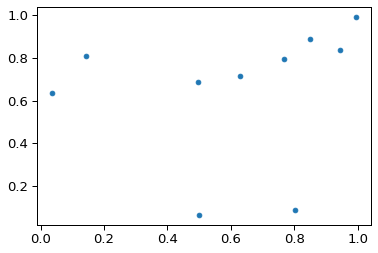

In [114]:
plt.scatter(objectives[:, 0], objectives[:, 1])

In [115]:
front = get_pareto(objectives)

In [116]:
front.shape

(2, 2)

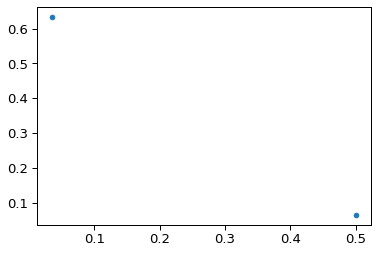

In [117]:
plt.scatter(front[:, 0], front[:, 1])

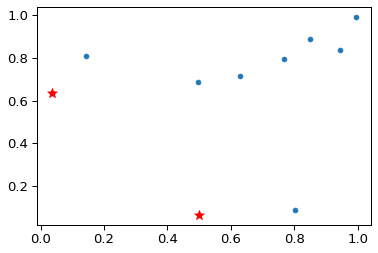

In [118]:
plt.scatter(objectives[:, 0], objectives[:, 1])
plt.scatter(front[:, 0], front[:, 1], c='r', marker='*', s=100)

In [119]:
w_ref = np.array([0.86120041, 0.99400258])  

In [120]:
hypervolume = get_hypervolume(objectives, w_ref=w_ref)

In [121]:
hypervolume

0.5022417295923242

In [122]:
objectives

array([[0.80249703, 0.08875115],
       [0.49614014, 0.68583518],
       [0.03494056, 0.63338614],
       [0.14466337, 0.80585723],
       [0.50075701, 0.06664295],
       [0.76914913, 0.79228611],
       [0.62743649, 0.71383301],
       [0.9460317 , 0.83582852],
       [0.85077809, 0.88920133],
       [0.99519535, 0.99073136]])

In [123]:
np.amax(objectives,axis=0)

array([0.99519535, 0.99073136])

In [163]:
param_space = ParameterSpace()
param_space.add(ParameterContinuous(name='value_0'))
param_space.add(ParameterContinuous(name='value_1'))
scalarizer = Scalarizer(
    kind='Hypervolume', 
    value_space=param_space,
    goals=['min', 'min'],
)

In [164]:
merits = scalarizer.scalarize(objectives)

(10, 2)
obs shape :  (1, 2)
m_ :  0.1738100742415769
obs shape :  (1, 2)
m_ :  0.15216002648988503
obs shape :  (1, 2)
m_ :  0.34314245744789573
obs shape :  (1, 2)
m_ :  0.15724135523176536
obs shape :  (1, 2)
m_ :  0.4569047420764427
obs shape :  (1, 2)
m_ :  0.04485779940892563
obs shape :  (1, 2)
m_ :  0.10183182185162536
obs shape :  (1, 2)
m_ :  0.0076155889730613975
obs shape :  (1, 2)
m_ :  0.014662689190446259
obs shape :  (1, 2)
m_ :  0.0
unormalized merit :  [0.17381007 0.15216003 0.34314246 0.15724136 0.45690474 0.0448578
 0.10183182 0.00761559 0.01466269 0.        ]
normalized merit :  [0.38040768 0.33302352 0.75101531 0.34414472 1.         0.09817757
 0.2228732  0.01666778 0.03209135 0.        ]
inverted merit :  [0.61959232 0.66697648 0.24898469 0.65585528 0.         0.90182243
 0.7771268  0.98333222 0.96790865 1.        ]


In [137]:
merits.shape

(19,)

In [138]:
objectives.shape

(10, 2)